<a href="https://colab.research.google.com/github/JyothikaGupta/ps3/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
retail = pd.read_csv('data.csv',encoding= 'unicode_escape')


In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail = retail[pd.notnull(retail['CustomerID'])]

In [ ]:
retail['Sales'] = retail['Quantity'] * retail['UnitPrice']
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
customer_retail = retail.groupby('CustomerID').agg({'Sales': sum, 
                               'InvoiceNo': lambda x: x.nunique()})
customer_retail.head(5)

,Sales,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [ ]:
customer_retail.columns = ['TotalSales', 'OrderCount'] 
customer_retail.head(5)

,TotalSales,OrderCount
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [ ]:
customer_retail['AvgOrderValue'] = customer_retail['TotalSales'] / customer_retail['OrderCount']
customer_retail.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [ ]:
rank_retail = customer_retail.rank(method='first')
normalized_retail = (rank_retail - rank_retail.mean()) / rank_retail.std()
normalized_retail.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,-1.698182,-0.691236,-1.698182
12347.0,1.479522,1.026356,1.431195
12348.0,0.956639,0.344231,1.149155
12349.0,0.934456,-1.731457,1.702143
12350.0,-0.704704,-1.730664,0.669845


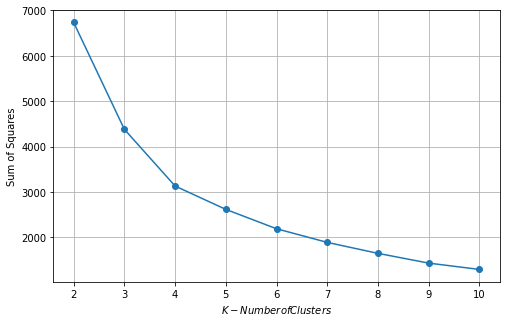

In [ ]:
sse = []
krange = list(range(2,11))
X = normalized_retail[['TotalSales','OrderCount','AvgOrderValue']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

# Plot the results.
fig = plt.figure(figsize = (8,5))
plt.plot(krange, sse, marker='o')
plt.xlabel("$K - Number of Clusters$")
plt.ylabel("Sum of Squares")
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4).fit(normalized_retail[['TotalSales', 'OrderCount', 'AvgOrderValue']])
four_clusters = normalized_retail[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_clusters['Cluster'] = kmeans.labels_
four_clusters.head(5)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,-1.698182,-0.691236,-1.698182,2
12347.0,1.479522,1.026356,1.431195,3
12348.0,0.956639,0.344231,1.149155,3
12349.0,0.934456,-1.731457,1.702143,0
12350.0,-0.704704,-1.730664,0.669845,0


In [ ]:
df = customer_retail
frame = pd.DataFrame(df)
frame['Cluster'] = four_clusters['Cluster']
frame.head(5)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,0.00,2,0.000000,2
12347.0,4310.00,7,615.714286,3
12348.0,1797.24,4,449.310000,3
12349.0,1757.55,1,1757.550000,0
12350.0,334.40,1,334.400000,0


Text(0, 0.5, 'Total Sales ($)')

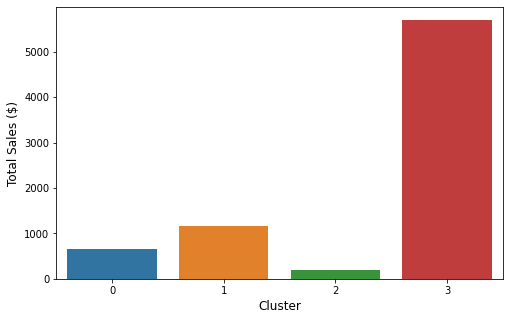

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Cluster', 
            y = 'TotalSales', 
            data = frame,
            ci = None)
# Add labels.
plt.xlabel("Cluster", size=12)
plt.ylabel("Total Sales ($)", size=12)

Text(0, 0.5, 'Order Count')

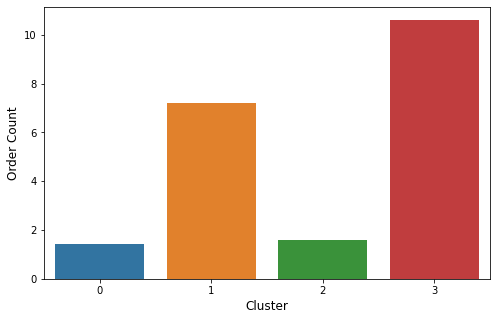

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Cluster', 
            y = 'OrderCount', 
            data = frame,
            ci = None)
# Add labels
plt.xlabel("Cluster", size=12)
plt.ylabel("Order Count", size=12)

Text(0, 0.5, 'Average Order Value')

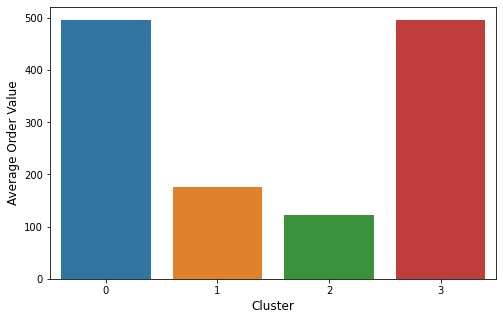

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Cluster', 
            y = 'AvgOrderValue', 
            data = frame,
            ci = None)
# Add labels.
plt.xlabel("Cluster", size=12)
plt.ylabel("Average Order Value", size=12)

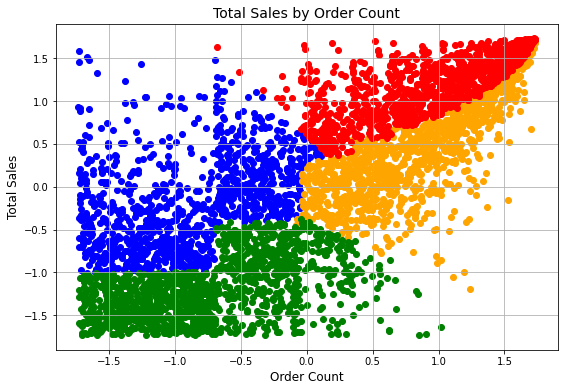

In [ ]:
fig = plt.figure(figsize = (9,6))
plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 0]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 0]['TotalSales'],
    c='blue')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 1]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 1]['TotalSales'],
    c='orange')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 2]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 2]['TotalSales'],
    c='green')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 3]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 3]['TotalSales'],
    c='red')

plt.title('Total Sales by Order Count', size=14)
plt.xlabel('Order Count', size=12)
plt.ylabel('Total Sales', size=12)

plt.grid()
plt.show()


    


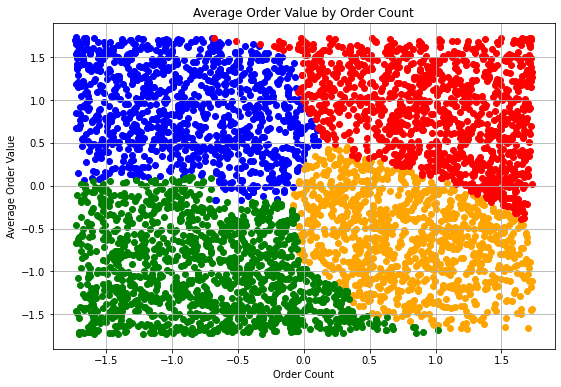

In [ ]:
# Visualize the clusters for average order value by order count
fig = plt.figure(figsize = (9,6))
plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 0]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 1]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 1]['AvgOrderValue'],
    c='orange')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 2]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 2]['AvgOrderValue'],
    c='green')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 3]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 3]['AvgOrderValue'],
    c='red')

plt.title('Average Order Value by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Average Order Value')

plt.grid()
plt.show()








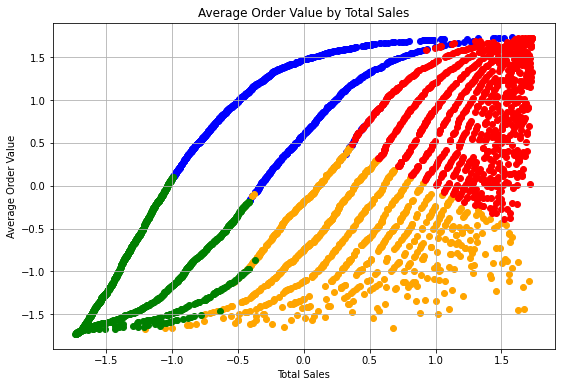

In [ ]:
fig = plt.figure(figsize = (9,6))
plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 0]['TotalSales'], 
    four_clusters.loc[four_clusters['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 1]['TotalSales'], 
    four_clusters.loc[four_clusters['Cluster'] == 1]['AvgOrderValue'],
    c='orange')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 2]['TotalSales'], 
    four_clusters.loc[four_clusters['Cluster'] == 2]['AvgOrderValue'],
    c='green')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 3]['TotalSales'], 
    four_clusters.loc[four_clusters['Cluster'] == 3]['AvgOrderValue'],
    c='red')

plt.title('Average Order Value by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Average Order Value')

plt.grid()
plt.show()

In [ ]:
high_value_cluster = four_clusters.loc[four_clusters['Cluster'] == 0]
high_value_cluster

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12349.0,0.934456,-1.731457,1.702143,0
12350.0,-0.704704,-1.730664,0.669845,0
12354.0,0.520110,-1.729080,1.651440,0
12355.0,-0.360869,-1.728288,1.182429,0
12357.0,1.580137,-1.727495,1.731457,0
...,...,...,...,...
18240.0,-0.444055,-0.698366,1.066761,0
18246.0,-0.116064,-0.051100,0.404442,0
18251.0,1.480314,-0.696782,1.727495,0


In [ ]:
pd.DataFrame(retail.groupby('Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2070
REGENCY CAKESTAND 3 TIER,1905
JUMBO BAG RED RETROSPOT,1662
ASSORTED COLOUR BIRD ORNAMENT,1418
PARTY BUNTING,1416


In [ ]:
high_value_cluster = four_clusters.loc[four_clusters['Cluster'] == 0]

pd.DataFrame(retail.loc[retail['CustomerID'].isin(high_value_cluster.index)].groupby(
    'Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,175
WHITE HANGING HEART T-LIGHT HOLDER,155
ASSORTED COLOUR BIRD ORNAMENT,148
POSTAGE,140
SET OF 3 CAKE TINS PANTRY DESIGN,138
